In [27]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import StatePreparation
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit.visualization import plot_distribution
from qiskit.visualization import plot_coupling_map
from qiskit.transpiler import CouplingMap

In [28]:
# allowed gates: x, h, rz, cx
# allowed depth: less than 50

size = 5  # number of qubits
state_values = [22, 17, 27, 12]
state_vector = [0] * 2**size
for s in state_values:
    print(np.binary_repr(s, size))
    state_vector[s] = 0.5
np.asarray(state_vector)

10110
10001
11011
01100


array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5,
       0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ,
       0. , 0.5, 0. , 0. , 0. , 0. ])

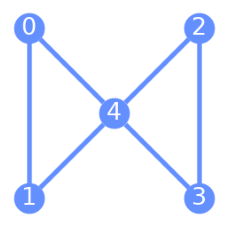

In [29]:
num_qubits = 5
qubit_coordinates = [[2, 0], [0, 0], [2, 2], [0, 2], [1, 1]]
coupling_map = [[0, 1], [2, 3], [0, 4], [2, 4], [1, 4], [3, 4]]
plot_coupling_map(num_qubits, qubit_coordinates, coupling_map)

58


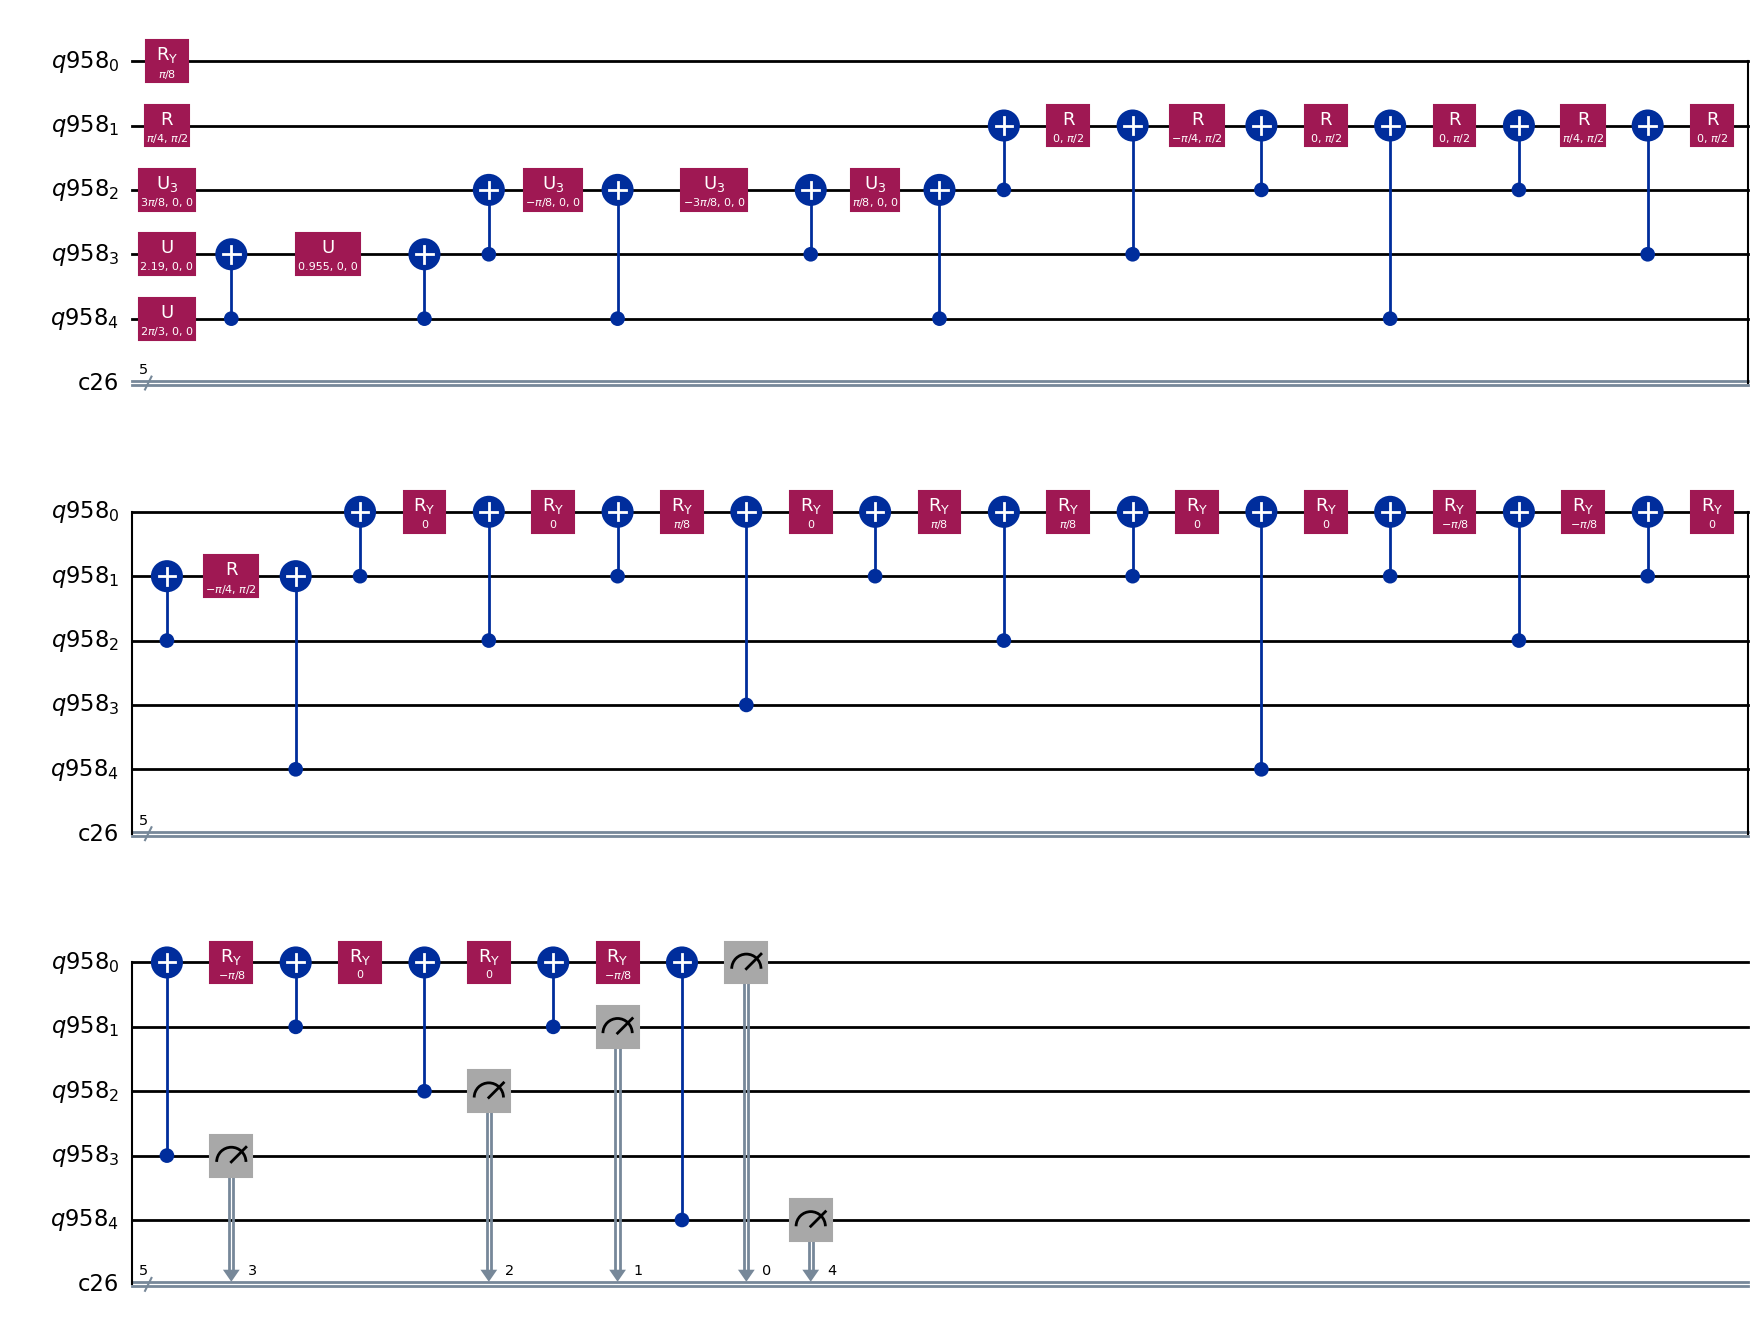

In [51]:
qubits = 5
qreg = QuantumRegister(qubits)
creg = ClassicalRegister(qubits)
qc = QuantumCircuit(qreg, creg)

# state preparation
# required state: (∣10110⟩+∣10001⟩+∣11011⟩+∣01100⟩)/2
# prepare using [x, h, rz, cx]
# just keep the states: 10110, 10001, 11011, 01100

qc.append(StatePreparation(state_vector), qreg)


qc.measure(qreg, creg)
qc = (
    qc.decompose()
    .decompose()
    .decompose()
    .decompose()
    .decompose()
    .decompose()
    .decompose()
)
print(qc.depth())
qc.draw(output="mpl")

178


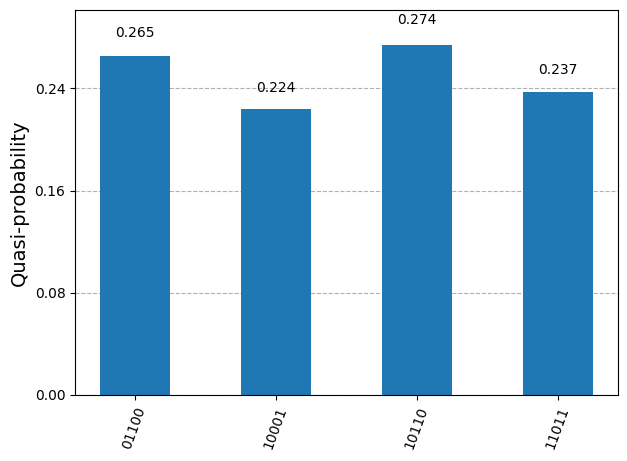

In [43]:
simulator = AerSimulator()
qc_transpiled = transpile(
    qc,
    simulator,
    basis_gates=["x", "h", "rz", "cx"],
    optimization_level=3,
    coupling_map=coupling_map,
)
print(qc_transpiled.depth())
job = simulator.run(qc_transpiled, shots=1000)
counts = job.result().get_counts(qc_transpiled)
plot_distribution(counts)

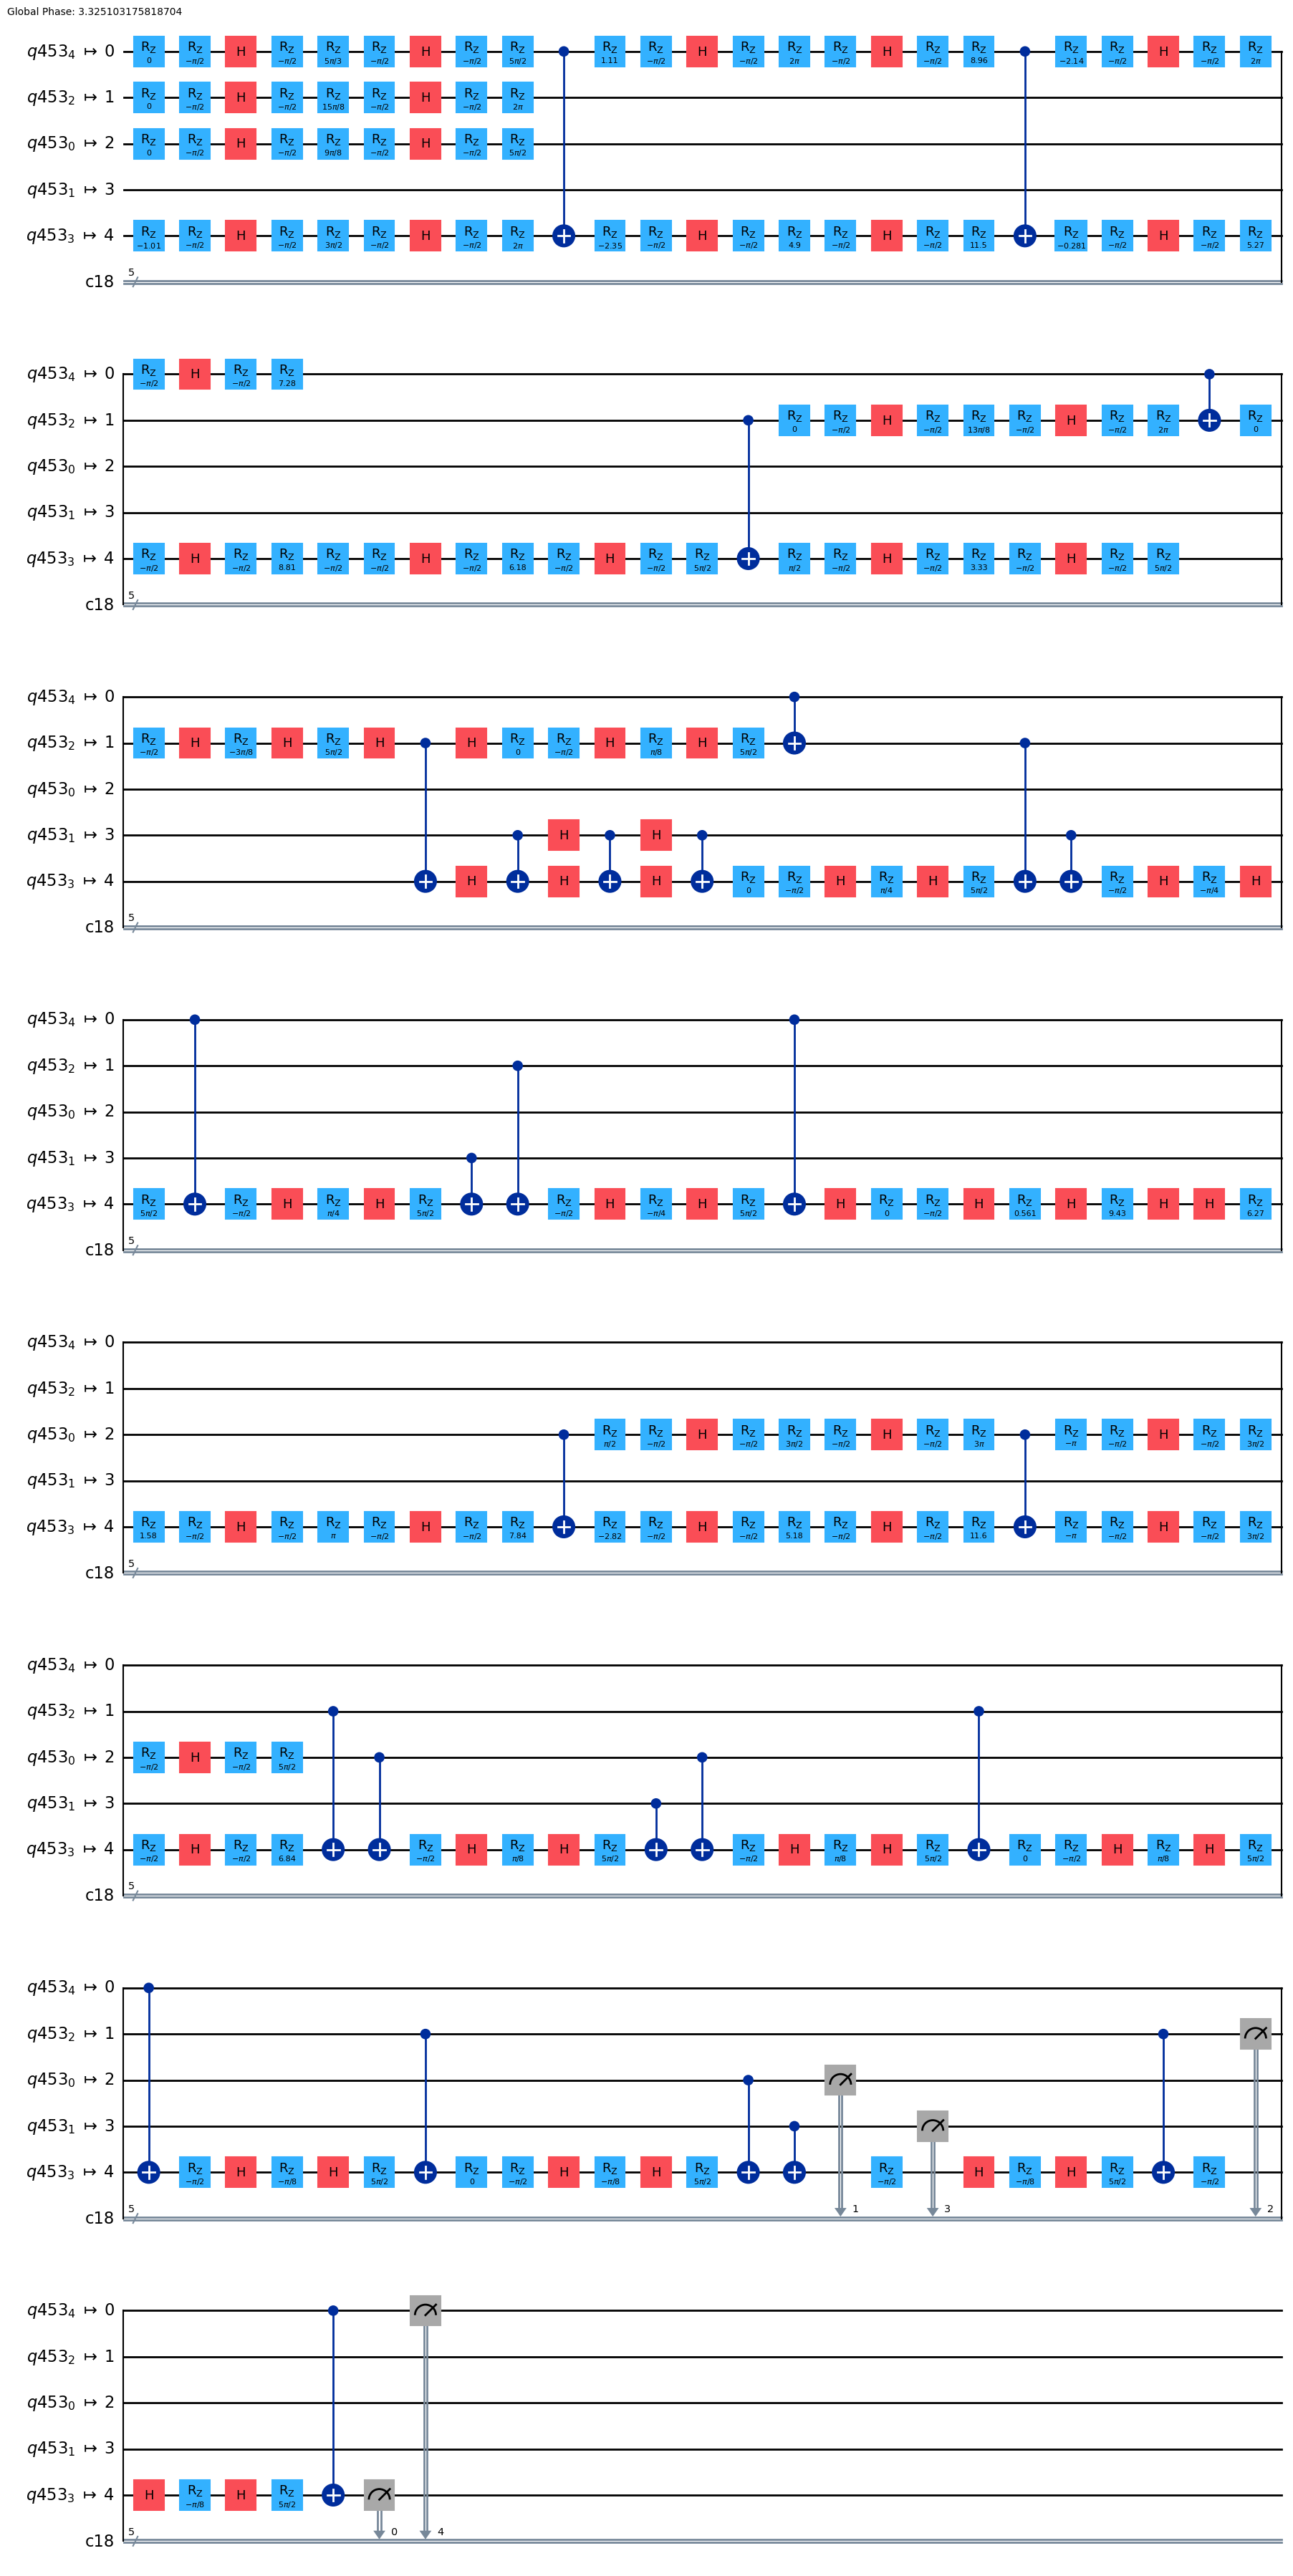

In [52]:
qc_transpiled.draw(output="mpl")